<a href="https://colab.research.google.com/github/qutubuddeen/Neural-network-for-Image-Classification-with-Tensorflow/blob/main/Neural_Network_for_image_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 

In [2]:
print('tensorflow version',tf.__version__)

print('keras version',keras.__version__)

tensorflow version 2.4.0
keras version 2.4.0


Set the random seed for tf and np so as to reuse same set of random variables and reproduce the results.


In [3]:
np.random.seed(20)
tf.random.set_seed(20)



Loading the Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
x_train_full.shape

(60000, 28, 28)

In [7]:
y_train_full.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

Slice the first 5000 samples from the X_train_full and divide the values by 255. to scale the image pixel values to be in the range 0-1. Store these first 5000 scaled samples in X_valid.



In [10]:
x_valid = x_train_full[:5000] / 255

Store the first 5000 values from y_train_full to form the y_valid.




In [11]:
y_valid = y_test[:5000]

Similarly, slice the remaining samples from 5000 of the X_train_full and divide the values by 255. to scale the image pixel values to be in the range 0-1. Store these first 5000 scaled samples in X_train.



In [12]:
x_train = x_train_full[5000:] / 255

Store the remaining samples from 5000 of the y_train_full to form the y_train.



In [13]:
y_train = y_train_full[5000:]

Shape of validation set

In [14]:
x_valid.shape

(5000, 28, 28)

Visualizing the data

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

Class label is: 4
Class name is: Coat


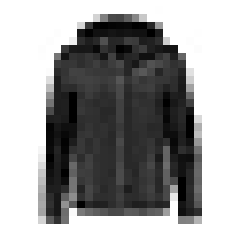

In [19]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

Let's take a look at a sample of the images in the dataset.



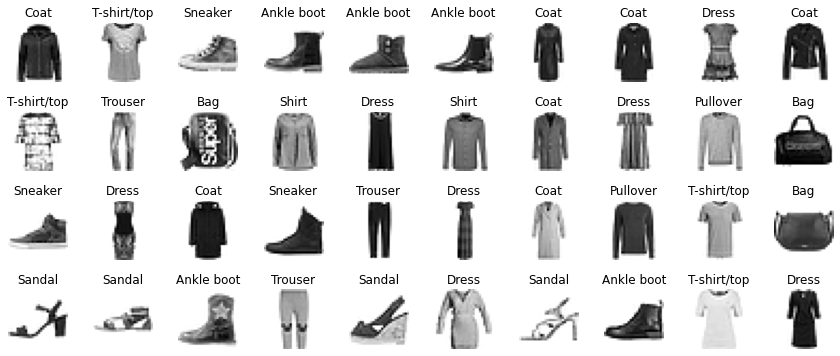

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Bulding the model

First clear the session

In [21]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

let's build the model

In [22]:
model = keras.models.Sequential([
                        keras.layers.Flatten(input_shape = [28,28]),
                        keras.layers.Dense(300,activation='relu'),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')

])

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Let us plot the arcitecture of model and save it into my_fashion_mnist_model.png file.



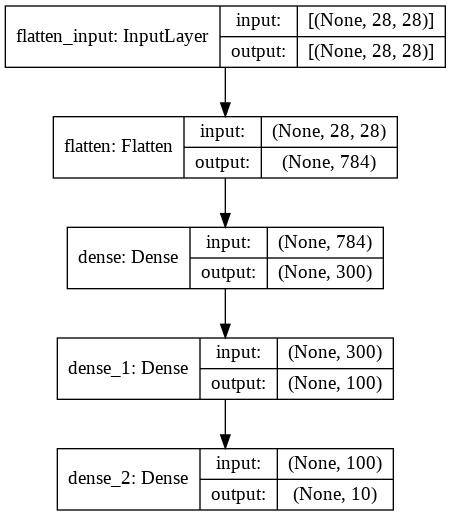

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)



Define the sgd optimizer by using keras.optimizers.SGD and setting the learning_rate=0.01.



In [29]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

In [33]:
history = model.fit(x_train, y_train, epochs=30,
            validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9888 - accuracy: 0.6908 - val_loss: 7.0125 - val_accuracy: 0.1016
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8232 - val_loss: 7.7199 - val_accuracy: 0.1024
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4561 - accuracy: 0.8390 - val_loss: 8.2010 - val_accuracy: 0.1026
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4298 - accuracy: 0.8505 - val_loss: 8.3659 - val_accuracy: 0.1012
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 8.6608 - val_accuracy: 0.1010
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3833 - accuracy: 0.8648 - val_loss: 8.9301 - val_accuracy: 0.1000
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3686 - accuracy: 0.8678 - val_loss: 8.8980 - val_accuracy:

In [34]:
history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [35]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


Let us use get_weights() function to see the trained weights and biases of the hidden1.



In [38]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print('shape of weight is {0} and the weight is {1}',weights.shape, weights)
print('biases is :',biases)

shape of weight is {0} and the weight is {1} (784, 300) [[ 0.04312099 -0.00393997 -0.01490285 ... -0.01877911 -0.03146947
   0.04408841]
 [-0.07008542 -0.03260297  0.02167102 ... -0.02178022 -0.03459677
  -0.003532  ]
 [ 0.01507779  0.06011617 -0.03285735 ...  0.00108927 -0.04740544
   0.01959266]
 ...
 [ 0.01809882  0.01087052  0.01959073 ... -0.02129731  0.05880068
  -0.02815234]
 [ 0.02691386  0.02756038  0.05392386 ... -0.05009894 -0.05162295
   0.06824722]
 [-0.06609789 -0.01316568  0.0306801  ... -0.04325993 -0.01736031
   0.03992103]]
biases is : [ 6.50709402e-03 -2.99706403e-02  3.38928178e-02 -1.25784054e-01
 -2.20752433e-02 -6.65787086e-02  3.60427387e-02  5.61549775e-02
  1.97904464e-02  3.07026595e-01  1.43169565e-02  6.45900816e-02
  4.94446345e-02  2.73476802e-02 -1.51286582e-02  2.36164685e-02
 -2.59525627e-02 -3.79085615e-02 -5.43278493e-02 -5.37863839e-03
  8.91425312e-02  8.65620747e-03 -4.99570146e-02  1.14558451e-01
  1.19694220e-02  1.17393784e-01  1.70315243e-02  

Let us visualize the model training history. Here, history.history is a dictionary containing information about the accuracy and loss measures through the epochs.



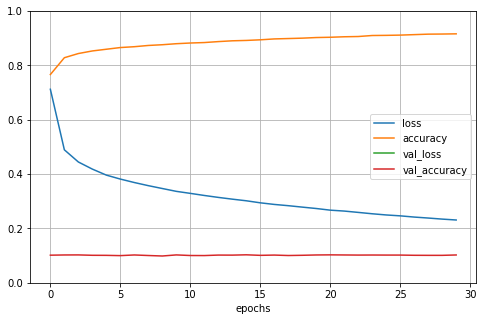

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.xlabel('epochs')
plt.show()

Model Evaluation

In [43]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 81.9240 - accuracy: 0.8157


[81.92395782470703, 0.8156999945640564]

Let us predict and visualize the first 3 samples from the test data.



In [45]:
y_pred = model.predict_classes(x_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])

[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Visualize the predictions for the first 3 samples from the test data:



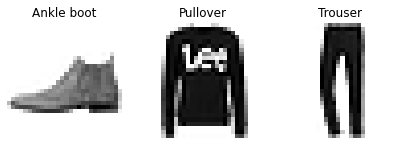

In [47]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()